In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Walmart Exploratory Data Analysis (EDA)
This project entails an in-depth analysis of Walmart sales data, aimed at extracting valuable insights and trends. We will uncover the underlying drivers of weekly sales. Our examination will encompass various factors, including holidays, temperature fluctuations, fuel prices, the consumer price index (CPI), and unemployment rates, allowing us to illuminate intricate relationships and offer actionable recommendations for optimizing resource allocation and refining retail strategies.

## Importing the data

In [ ]:
# Load your dataset into a Pandas DataFrame
walmart_file_path = '/content/drive/MyDrive/Colab Notebooks/Walmart Data Analysis and Forcasting.csv'
df = pd.read_csv(walmart_file_path)

In [ ]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-36-fca1e1e1e4d3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


## Inspecting the data

In [ ]:
#Prints first 10 rows
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
#Summary statistics of the dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#Provides information about the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Clean the data

In [ ]:
# Check for null values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


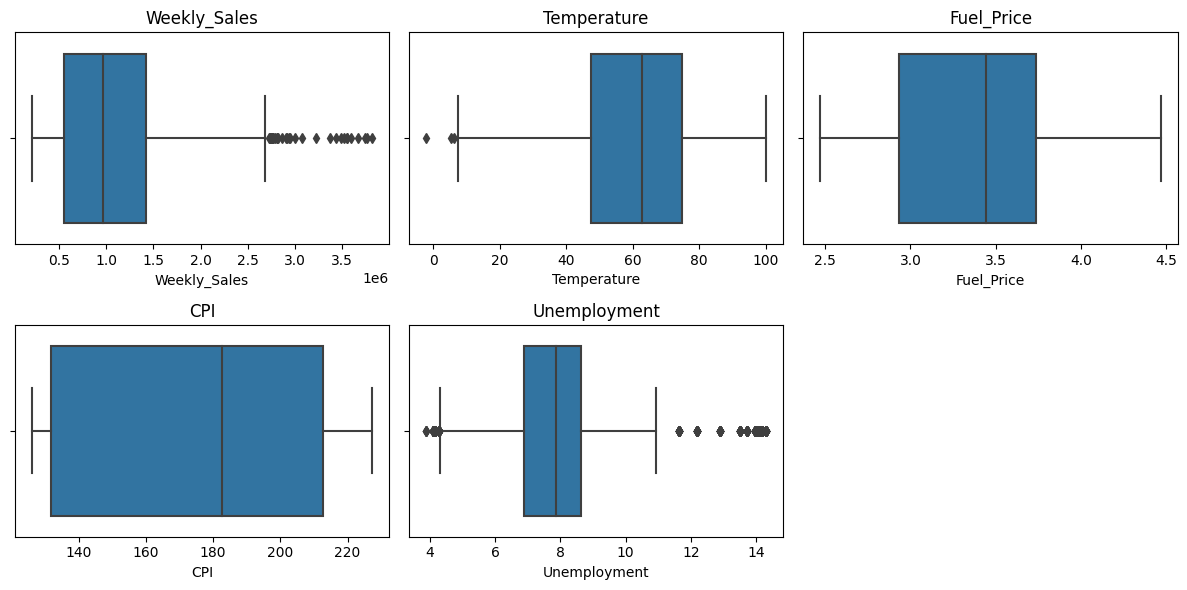

In [ ]:
# Step 2a: Handling Outliers
# Identify columns with potential outliers
outlier_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Visualize box plots to detect outliers
plt.figure(figsize=(12, 6))
for col in outlier_columns:
    plt.subplot(2, 3, outlier_columns.index(col) + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 2b: Addressing Outliers (Example: Using IQR)
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Apply outlier removal using IQR
df = df[~((df[outlier_columns] < (Q1 - 1.5 * IQR)) | (df[outlier_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


Note: 518 rows were removed after getting rid of outliers. Our summary stats have changed slightly

### Data Distributions

<Figure size 1600x1000 with 0 Axes>

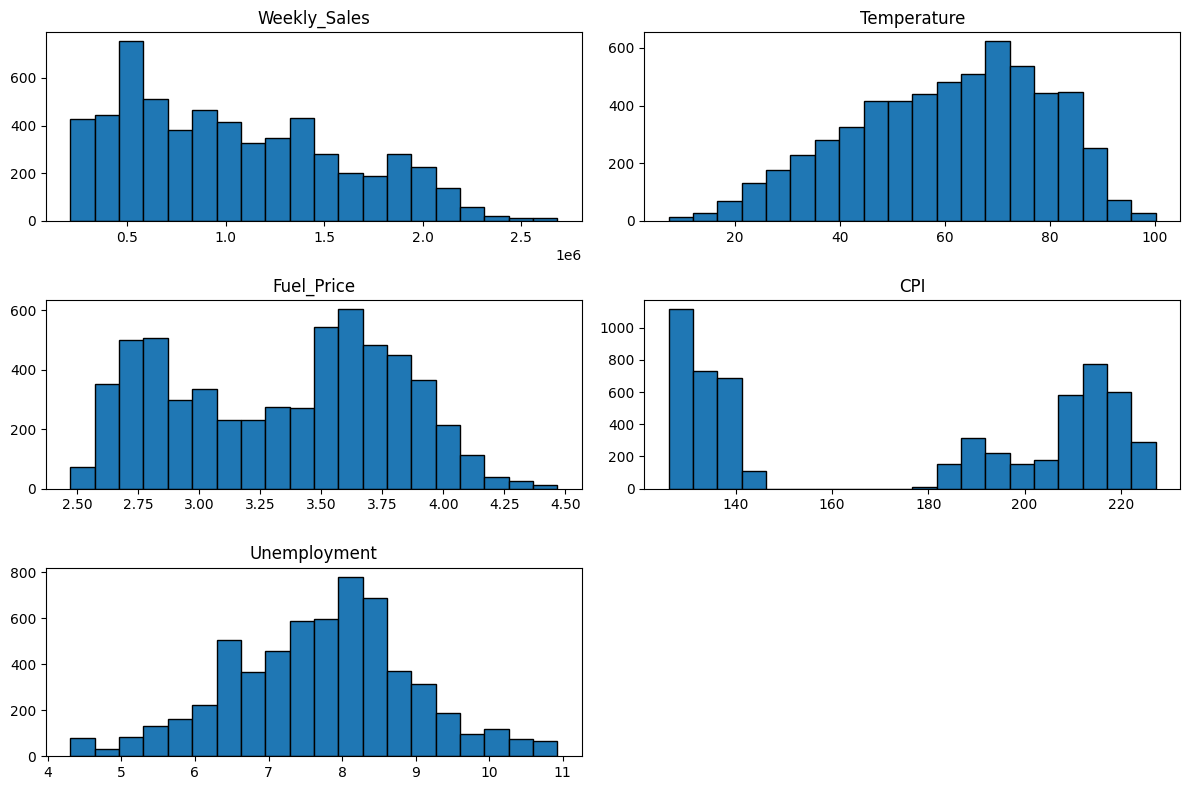

In [ ]:
# Step 4: Visualize Data Distributions
plt.figure(figsize=(16, 10))
ax = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].hist(bins=20, edgecolor='black', grid=False, figsize=(12, 8))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

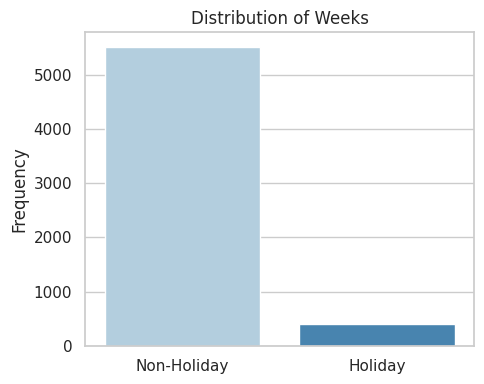

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
holiday_counts = df['Holiday_Flag'].value_counts()

# Create a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette='Blues')
plt.title('Distribution of Weeks')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()


#Relationship between variables

Identify initial relationships and potential patterns among numerical variables. This provides a foundation for further exploration and insights.

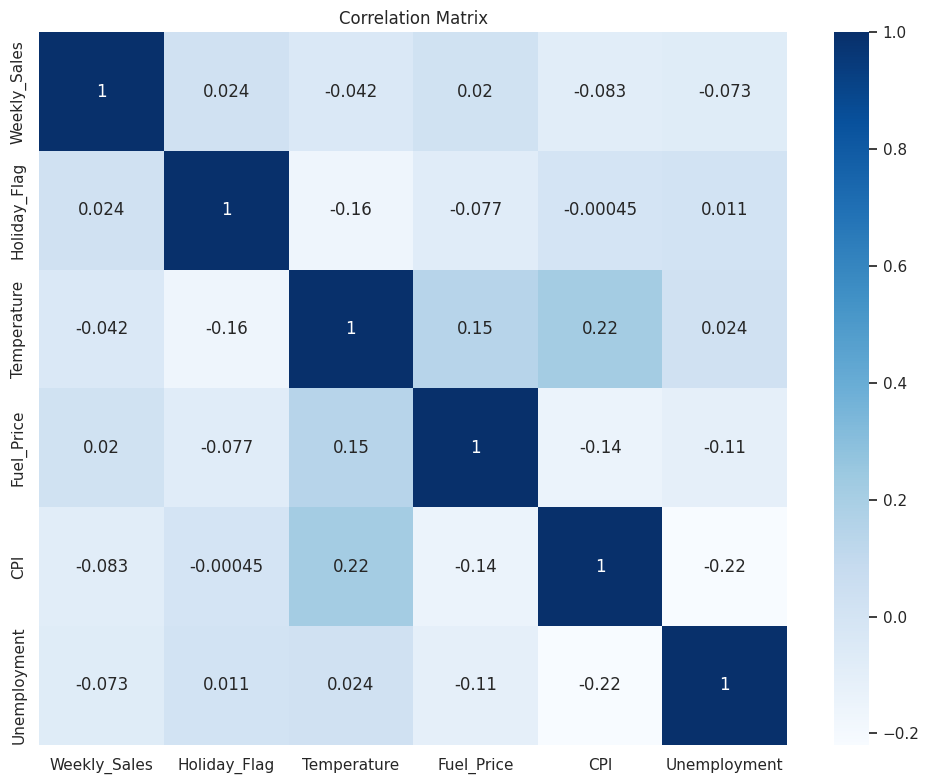

In [ ]:
# Correlation Analysis
correlation_matrix = df.drop(columns=['Date', 'Month', 'Store']).corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

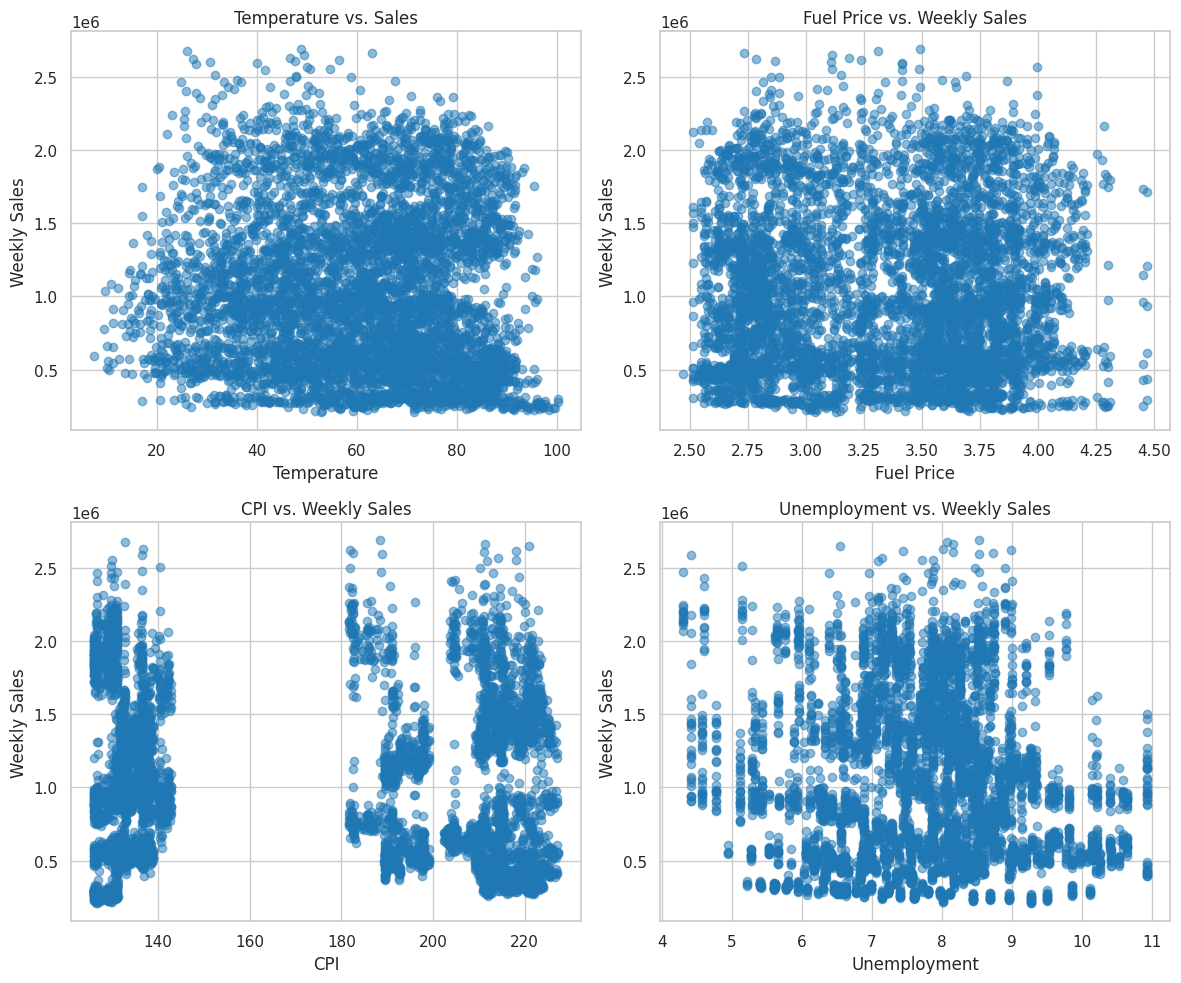

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Temperature vs Sales
axs[0, 0].scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
axs[0, 0].set_title('Temperature vs. Sales')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Weekly Sales')

# Fuel prices vs sales
axs[0, 1].scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5)
axs[0, 1].set_title('Fuel Price vs. Weekly Sales')
axs[0, 1].set_xlabel('Fuel Price')
axs[0, 1].set_ylabel('Weekly Sales')

# CPI vs. Weekly Sales
axs[1, 0].scatter(df['CPI'], df['Weekly_Sales'], alpha=0.5)
axs[1, 0].set_title('CPI vs. Weekly Sales')
axs[1, 0].set_xlabel('CPI')
axs[1, 0].set_ylabel('Weekly Sales')

# Unemployment vs Sales
axs[1, 1].scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.5)
axs[1, 1].set_title('Unemployment vs. Weekly Sales')
axs[1, 1].set_xlabel('Unemployment')
axs[1, 1].set_ylabel('Weekly Sales')

# Adjust layout and display
plt.tight_layout()
plt.show()


While the observed correlations among variables may not exhibit substantial strength, we can still extract meaningful insights by analyzing both the correlation matrix and scatterplots.

Weekly_Sales and Holiday_Flag: Have a postive correlation, indicating that there is a tendency for higher weekly sales to coincide with holiday weeks. This positive correlation suggests that during holiday periods, there is an uptick in consumer spending, leading to increased sales. This could be attributed to various factors, such as special promotions, increased customer traffic, and higher demand for products typically associated with holidays.

Weekly_Sales displays negative correlations with three key factors: CPI, Unemployment, and Temperature. This suggests that when Consumer Price Index and Unemployment rates increase, as well as during warmer temperature periods, the weekly sales tend to decrease. These correlations imply a potential impact of economic and environmental conditions on sales trends.

Consumer Price Index (CPI) and Temperature variables: This positive correlation suggests could be attributed to several factors, such as higher demand for seasonal goods during warmer months, which may contribute to upward price pressures. Additionally, increased energy consumption, such as air conditioning, during hotter periods could lead to higher costs for consumers and potentially contribute to higher CPI values.

Unemployment and Temperature: This positive correlation suggests that as temperatures rise, the unemployment rate tends to increase as well.

CPI and Unemployment: The negative correlation of -0.3 implies that as unemployment rates increase, there is a tendency for the Consumer Price Index to decrease. This relationship might be indicative of a deflationary environment, where reduced consumer demand due to higher unemployment can lead to lower inflation rates.

#Time Analysis and Seasonal Trends
Understand how weekly sales vary over time. This provides a baseline understanding of the overall sales trend and helps you identify any significant changes or patterns.
Identify regular fluctuations or trends that occur during specific months or time periods.

In [ ]:
# Total Weekly Sales
total_weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Average Weekly Sales per Store
avg_weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean()

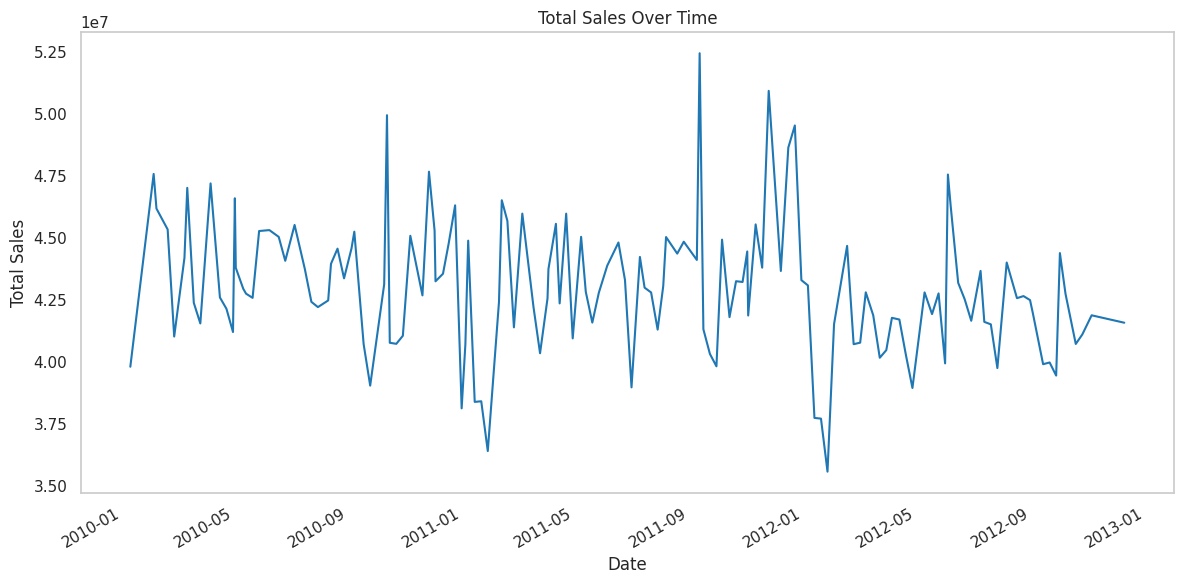

In [ ]:
# Total Weekly Sales
plt.figure(figsize=(12, 6))
total_weekly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(False)
plt.tight_layout()
plt.show()



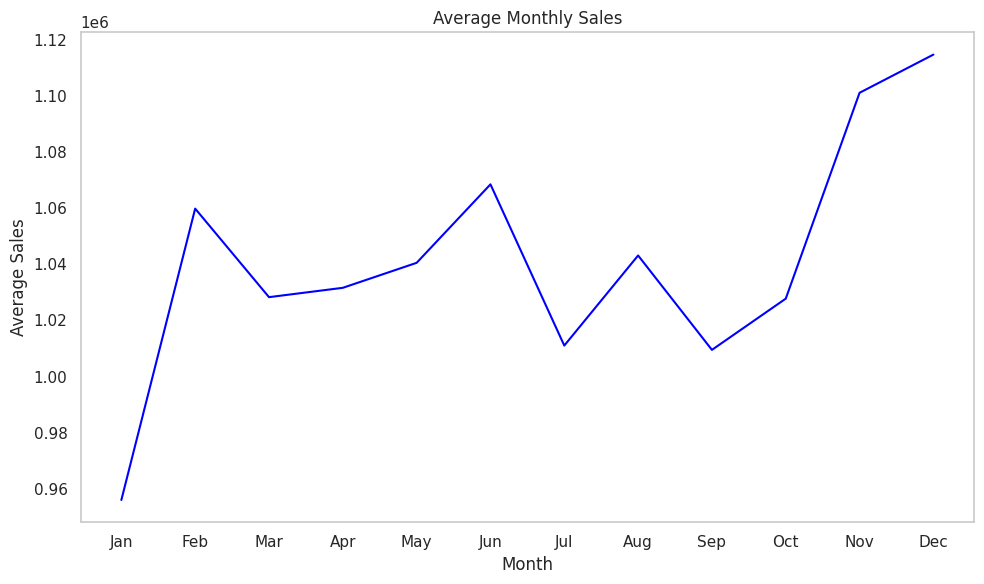

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average weekly sales for each month
avg_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean()

# Create a list of month names for labeling the x-axis
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Set up style and context
sns.set_style('whitegrid')
sns.set_context('notebook')

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_sales_by_month, color='b', linestyle='-')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), month_names)
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()


These charts reveal a notable jump in sales during the 4th quarter (Oct-Dec) of every year. This could be attributed to the holiday season and major shopping events like Black Friday, Cyber Monday.

Preparing for the expected surge in sales during the 4th quarter, we can ensure we have sufficient stock, implement enticing holiday promotions, and strategically allocate resources to meet the heightened demand.




## Holiday Analysis
Understand how holidays affect sales. Compare sales during holiday and non-holiday weeks. Compare how holidays affects sales at different stores.

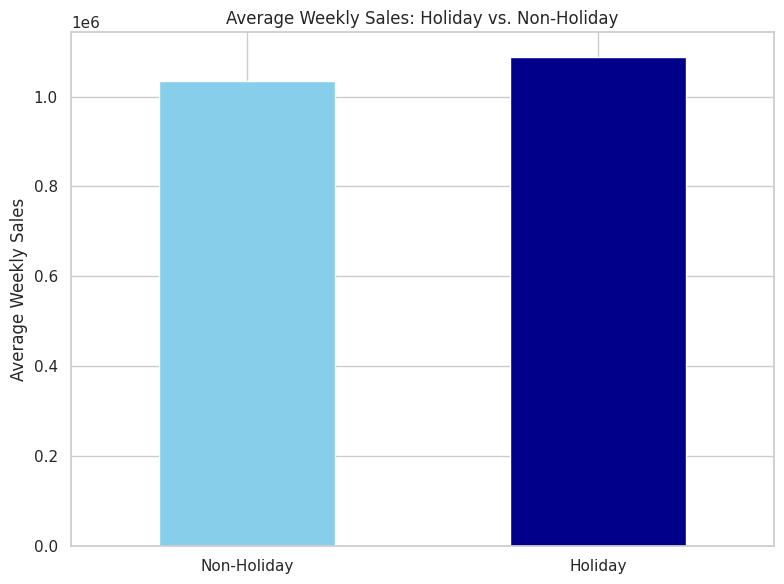

In [ ]:
#Weekly Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Holiday Impact
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['skyblue', 'darkblue'])
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

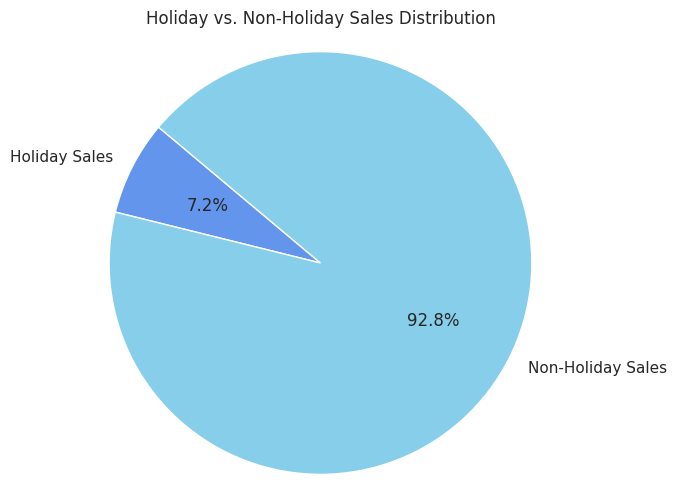

In [ ]:
import matplotlib.pyplot as plt

# Calculate total sales for holiday weeks and non-holiday weeks
total_sales = df['Weekly_Sales'].sum()
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()

# Calculate the percentage of total sales from holiday weeks
percentage_holiday_sales = (holiday_sales / total_sales) * 100

# Create a pie chart to visualize the distribution of holiday and non-holiday sales
labels = ['Holiday Sales', 'Non-Holiday Sales']
sizes = [percentage_holiday_sales, 100 - percentage_holiday_sales]
colors = ['cornflowerblue', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Holiday vs. Non-Holiday Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [ ]:
# Calculate the total number of holiday weeks
total_holiday_weeks = df['Holiday_Flag'].sum()

# Calculate the total number of weeks
total_weeks = len(df)

# Calculate the percentage of total weeks that are holiday weeks
percentage_holiday_weeks = (total_holiday_weeks / total_weeks) * 100

# Print the calculated percentage
print(f"Percentage of total weeks that are holiday weeks: {percentage_holiday_weeks:.2f}%")


Percentage of total weeks that are holiday weeks: 6.91%


Although holiday weeks constitute approximately 6.9% of the year, their significance becomes more pronounced when considering sales, as holiday-related sales contribute to approximately 7.2% of the total sales. This suggests that holiday periods have a slightly elevated impact on overall sales figures compared to their representation in the dataset's timeframe.

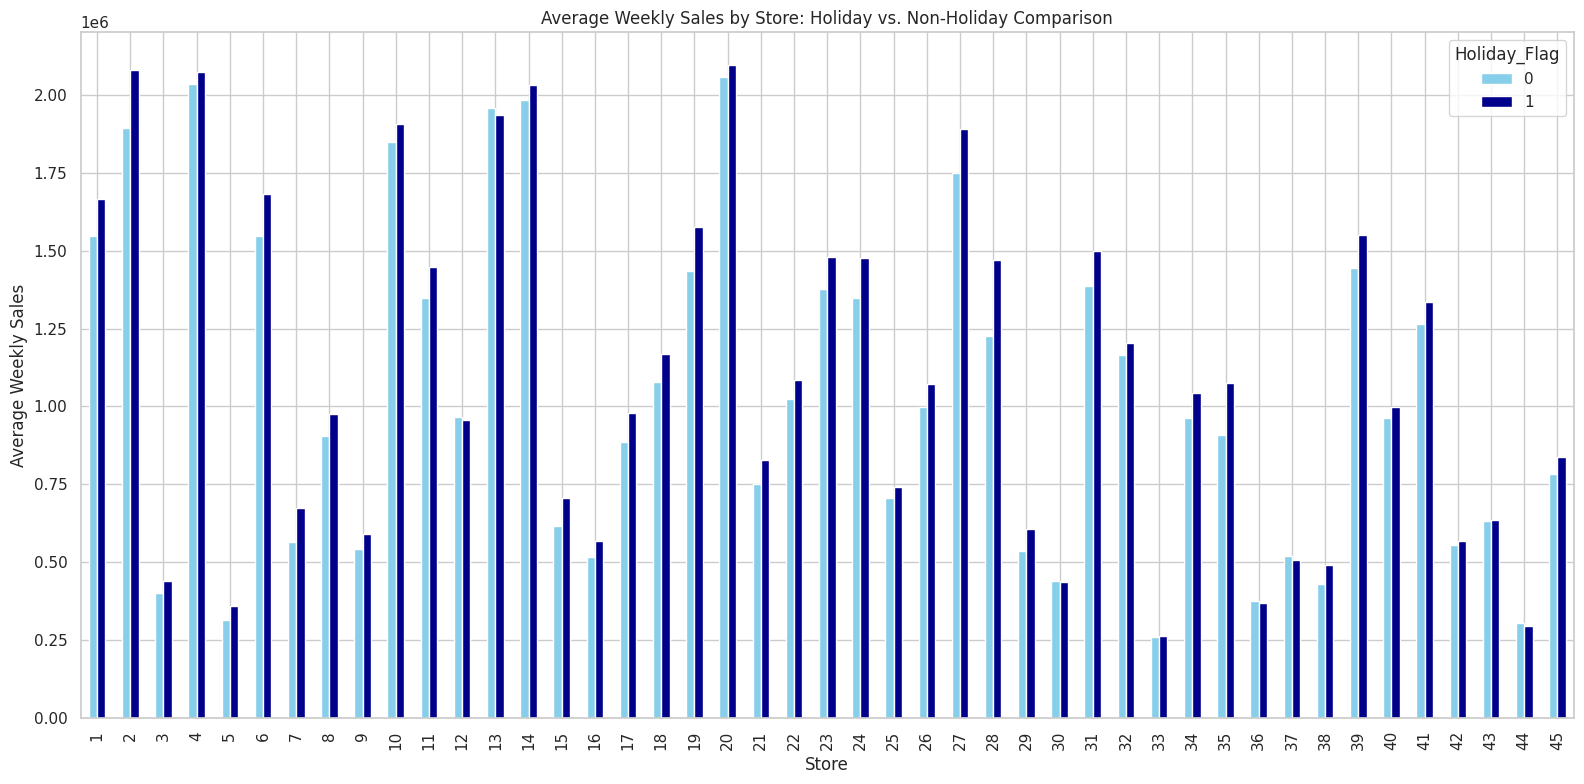

In [ ]:
# Holiday Season Analysis
holiday_sales_comparison = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

fig, ax = plt.subplots(figsize=(16, 8))

#Plot the data
holiday_sales_comparison.plot(kind='bar', ax=ax, color=['skyblue', 'darkblue'])

# Customize the plot
ax.set_title('Average Weekly Sales by Store: Holiday vs. Non-Holiday Comparison')
ax.set_xlabel('Store')
ax.set_ylabel('Average Weekly Sales')
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

The data suggests a distinct pattern in the impact of holidays on stores with varying average weekly sales. For stores with lower average weekly sales, the influence of holidays appears to be limited or even slightly negative. This could be attributed to a multitude of factors, including potentially less aggressive holiday marketing, fewer special offers, or a customer base that might not be as responsive to holiday promotions.

On the other hand, stores with higher average weekly sales demonstrate a more pronounced positive effect during holiday periods. This phenomenon could stem from several factors, such as robust marketing efforts, attractive holiday deals, and a customer base that is more inclined to make purchases during festive seasons.

Understanding these trends can guide decision-making in tailoring holiday-centric strategies for different store segments. For stores with lower average weekly sales, exploring innovative ways to enhance holiday appeal and engagement might yield positive results. For stores with higher average weekly sales, continued emphasis on effective holiday promotions can maximize the potential for increased sales during these periods.

#Store Performance & Sales Volatility
Explore variations in weekly sales across different stores. Get insights into store-specific trends and helps identify any unique patterns or outliers.

Identify stores with stable or fluctuating sales patterns. Get valuable information for resource allocation and decision-making, building on the insights gained from previous analyses.

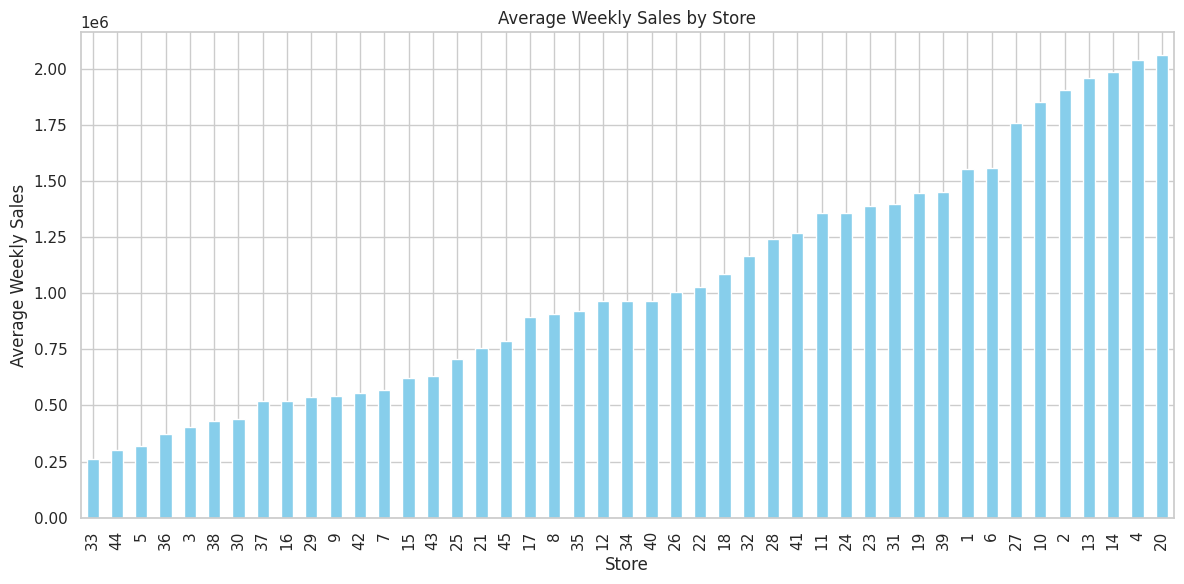

In [ ]:
# Average Weekly Sales by Store
plt.figure(figsize=(12, 6))
sorted_avg_weekly_sales = avg_weekly_sales_per_store.sort_values()
sorted_avg_weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Chart provides an overview of the relative sales performance of different stores. Stores with the highest average weekly sales potentially indicate a strong market presence and customer base. Conversely, stores that show comparatively lower sales suggest room for improvement and the need for targeted strategies to enhance its sales performance. Notably, Store 20 boasts the highest average weekly sales, while Store 33 lags significantly behind, with its average weekly sales amounting to just one-eighth of Store 20's, highlighting the substantial performance gap between the two stores.

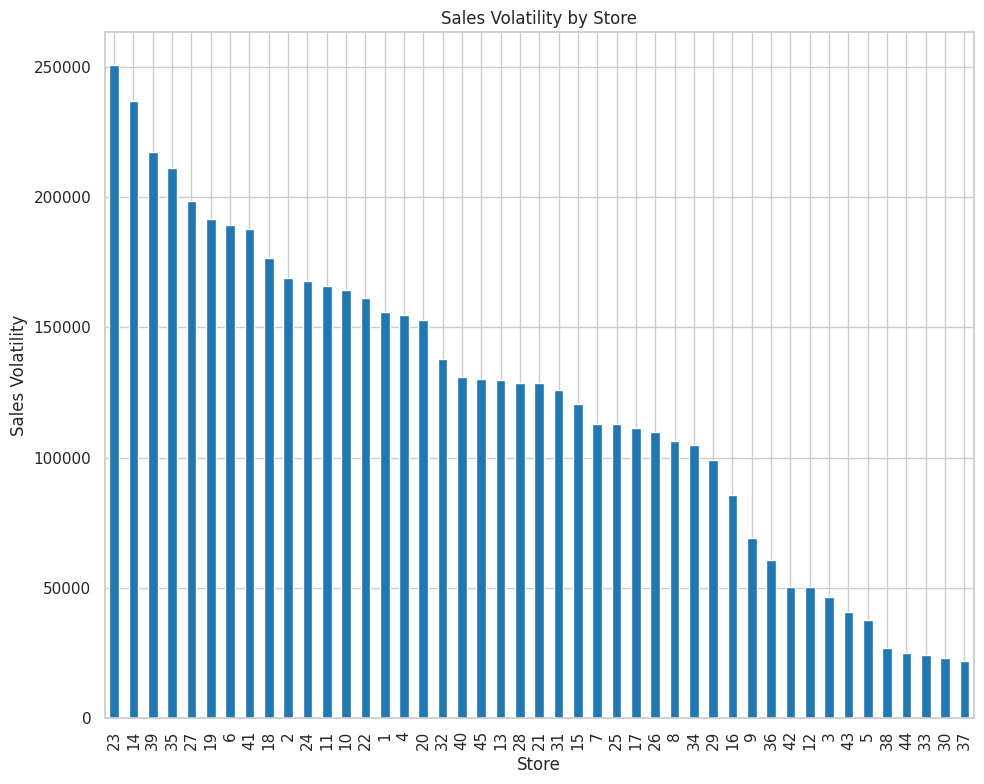

In [ ]:
# Sales Volatility
store_volatility = df.groupby('Store')['Weekly_Sales'].std()

# Visualization
plt.figure(figsize=(10, 8))
store_volatility.sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Volatility by Store')
plt.xlabel('Store')
plt.ylabel('Sales Volatility')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Chart illustrates the variability in weekly sales across different stores, with higher bars indicating greater fluctuations. Store 14 exhibits the highest volatility, suggesting inconsistent sales patterns, while Store 37 the most stable stable sales. For stores with higher sales volatility, it might be beneficial to implement dynamic inventory adjustments and supply chain strategies to better handle the varying demand patterns. In contrast, stores with lower sales volatility could benefit from more streamlined inventory management approaches.

#Summary and Insights
Our data analysis of Walmart's dataset has provided valuable insights into the company's sales performance and the factors influencing it. Through exploratory data analysis, we have identified trends in weekly sales, compared store performance, observed the impact of holidays on sales, and examined correlations between different variables such as temperature, CPI, and unemployment.

The examination unveiled that while holiday weeks comprise a modest fraction of the total time span, their impact on the cumulative sales is substantial. This valuable insight offers strategic direction for informed resource distribution and long-term planning, empowering effective business decision-making.

By examining average weekly sales across different stores, we identified disparities in performance, with some stores consistently outperforming others. This knowledge provides Walmart with a clearer understanding of store-specific dynamics and the potential for targeted interventions to improve underperforming stores and capitalize on the strengths of top-performing ones. Such insights contribute to a comprehensive view of the business landscape and aid in devising strategies for overall growth and success.

Furthermore, the correlations between variables shed light on potential drivers of sales fluctuations. Leveraging these insights, Walmart can make informed decisions to optimize inventory management, marketing strategies, and resource allocation to enhance overall performance.

